# Import packages and libraries

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; import matplotlib as mpl; import gsw

# Read in ETOPO file

In [2]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

# Eco-region shapes

In [3]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [4]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [5]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [6]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

In [7]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

# Load in files

In [8]:
jan = pd.read_csv('01-obsdens-mls5.csv'); feb = pd.read_csv('02-obsdens-mls5.csv')
march = pd.read_csv('03-obsdens-mls5.csv'); april = pd.read_csv('04-obsdens-mls5.csv')
may = pd.read_csv('05-obsdens-mls5.csv'); june = pd.read_csv('06-obsdens-mls5.csv')
july = pd.read_csv('07-obsdens-mls5.csv'); aug = pd.read_csv('08-obsdens-mls5.csv')
sept = pd.read_csv('09-obsdens-mls5.csv'); octob = pd.read_csv('10-obsdens-mls5.csv')
nov = pd.read_csv('11-obsdens-mls5.csv'); dec = pd.read_csv('12-obsdens-mls5.csv')

In [195]:
jan_t = pd.read_csv('01-obstemp-mls5.csv'); feb_t = pd.read_csv('02-obstemp-mls5.csv')
march_t = pd.read_csv('03-obstemp-mls5.csv'); april_t = pd.read_csv('04-obstemp-mls5.csv')
may_t = pd.read_csv('05-obstemp-mls5.csv'); june_t = pd.read_csv('06-obstemp-mls5.csv')
july_t = pd.read_csv('07-obstemp-mls5.csv'); aug_t = pd.read_csv('08-obstemp-mls5.csv')
sept_t = pd.read_csv('09-obstemp-mls5.csv'); octob_t = pd.read_csv('10-obstemp-mls5.csv')
nov_t = pd.read_csv('11-obstemp-mls5.csv'); dec_t = pd.read_csv('12-obstemp-mls5.csv')

In [197]:
print(jan_t)

      Unnamed: 0  obs_lat  obs_lon  glorys_lat  glorys_lon  glorys_lat_index  \
0              0  40.9517  71.1700   40.916668  -71.166664                71   
1              1  40.6983  71.0500   40.666668  -71.083336                68   
2              2  40.6517  70.5500   40.666668  -70.583336                68   
3              3  40.8317  70.3833   40.833332  -70.416664                70   
4              4  40.9017  70.6833   40.916668  -70.666664                71   
...          ...      ...      ...         ...         ...               ...   
1009        1009  39.3500  72.3650   39.333332  -72.333336                52   
1010        1010  39.6517  72.4117   39.666668  -72.416664                56   
1011        1011  39.5833  72.4450   39.583332  -72.416664                55   
1012        1012  39.6467  72.4750   39.666668  -72.500000                56   
1013        1013  39.6617  72.4450   39.666668  -72.416664                56   

      glorys_lon_index  bottomdepth  ye

In [9]:
valtorep = 5

In [10]:
jan['003densmld'] = np.where(jan['003densmld'] <= 5, valtorep, jan['003densmld'])
feb['003densmld'] = np.where(feb['003densmld'] <= 5, valtorep, feb['003densmld'])
march['003densmld'] = np.where(march['003densmld'] <= 5, valtorep, march['003densmld'])
april['003densmld'] = np.where(april['003densmld'] <= 5, valtorep, april['003densmld'])
may['003densmld'] = np.where(may['003densmld'] <= 5, valtorep, may['003densmld'])
june['003densmld'] = np.where(june['003densmld'] <= 5, valtorep, june['003densmld'])
july['003densmld'] = np.where(july['003densmld'] <= 5, valtorep, july['003densmld'])
aug['003densmld'] = np.where(aug['003densmld'] <= 5, valtorep, aug['003densmld'])
sept['003densmld'] = np.where(sept['003densmld'] <= 5, valtorep, sept['003densmld'])
octob['003densmld'] = np.where(octob['003densmld'] <= 5, valtorep, octob['003densmld'])
nov['003densmld'] = np.where(nov['003densmld'] <= 5, valtorep, nov['003densmld'])
dec['003densmld'] = np.where(dec['003densmld'] <= 5, valtorep, dec['003densmld'])

In [198]:
jan_t['02tempmld'] = np.where(jan_t['02tempmld'] <= 5, valtorep, jan_t['02tempmld'])
feb_t['02tempmld'] = np.where(feb_t['02tempmld'] <= 5, valtorep, feb_t['02tempmld'])
march_t['02tempmld'] = np.where(march_t['02tempmld'] <= 5, valtorep, march_t['02tempmld'])
april_t['02tempmld'] = np.where(april_t['02tempmld'] <= 5, valtorep, april_t['02tempmld'])
may_t['02tempmld'] = np.where(may_t['02tempmld'] <= 5, valtorep, may_t['02tempmld'])
june_t['02tempmld'] = np.where(june_t['02tempmld'] <= 5, valtorep, june_t['02tempmld'])
july_t['02tempmld'] = np.where(july_t['02tempmld'] <= 5, valtorep, july_t['02tempmld'])
aug_t['02tempmld'] = np.where(aug_t['02tempmld'] <= 5, valtorep, aug_t['02tempmld'])
sept_t['02tempmld'] = np.where(sept_t['02tempmld'] <= 5, valtorep, sept_t['02tempmld'])
octob_t['02tempmld'] = np.where(octob_t['02tempmld'] <= 5, valtorep, octob_t['02tempmld'])
nov_t['02tempmld'] = np.where(nov_t['02tempmld'] <= 5, valtorep, nov_t['02tempmld'])
dec_t['02tempmld'] = np.where(dec_t['02tempmld'] <= 5, valtorep, dec_t['02tempmld'])

In [11]:
winter = [dec, jan, feb]; winter_list = pd.concat(winter); winter_list_reindex = winter_list.reset_index()
spring = [march, april, may]; spring_list = pd.concat(spring); spring_list_reindex = spring_list.reset_index()
summer = [june, july, aug]; summer_list = pd.concat(summer); summer_list_reindex = summer_list.reset_index()
fall = [sept, octob, nov]; fall_list = pd.concat(fall); fall_list_reindex = fall_list.reset_index()

In [199]:
winter_t = [dec_t, jan_t, feb_t]; winter_list_t = pd.concat(winter_t); winter_list_reindex_t = winter_list_t.reset_index()
spring_t = [march_t, april_t, may_t]; spring_list_t = pd.concat(spring_t); spring_list_reindex_t = spring_list_t.reset_index()
summer_t = [june_t, july_t, aug_t]; summer_list_t = pd.concat(summer_t); summer_list_reindex_t = summer_list_t.reset_index()
fall_t = [sept_t, octob_t, nov_t]; fall_list_t = pd.concat(fall_t); fall_list_reindex_t = fall_list_t.reset_index()

In [12]:
print(len(winter_list_reindex))
winter_reset_no5 = winter_list_reindex[winter_list_reindex['003densmld'] <= 5] 
print(len(winter_reset_no5))
print('')
print(len(spring_list_reindex))
spring_reset_no5 = spring_list_reindex[spring_list_reindex['003densmld'] <= 5] 
print(len(spring_reset_no5))
print('')
print(len(summer_list_reindex))
summer_reset_no5 = summer_list_reindex[summer_list_reindex['003densmld'] <= 5] 
print(len(summer_reset_no5))
print('')
print(len(fall_list_reindex))
fall_reset_no5 = fall_list_reindex[fall_list_reindex['003densmld'] <= 5] 
print(len(fall_reset_no5))

4423
107

11935
1517

8739
3475

11076
1180


In [13]:
full = [jan.reset_index(), feb.reset_index(), march.reset_index(), april.reset_index(), 
        may.reset_index(), june.reset_index(), july.reset_index(), aug.reset_index(), 
        sept.reset_index(), octob.reset_index(), nov.reset_index(), dec.reset_index()]

In [200]:
full_t = [jan_t.reset_index(), feb_t.reset_index(), march_t.reset_index(), april_t.reset_index(), 
        may_t.reset_index(), june_t.reset_index(), july_t.reset_index(), aug_t.reset_index(), 
        sept_t.reset_index(), octob_t.reset_index(), nov_t.reset_index(), dec_t.reset_index()]

In [14]:
full_list = pd.concat(full); full_list_reindex = full_list.reset_index()

In [201]:
full_list_t = pd.concat(full_t); full_list_reindex_t = full_list_t.reset_index()

In [15]:
t_full_mean = []; t_interann_mean = []; t_full_std = []; t_interann_std = []; t_full_mlt_mean = []; t_full_mlt_std = []
t_interann_mlt_mean = []; t_interann_mlt_std = []

y_full_mean = []; y_interann_mean = []; y_full_std = []; y_interann_std = []; y_full_mlt_mean = []; y_full_mlt_std = []
y_interann_mlt_mean = []; y_interann_mlt_std = []

w_full_mean = []; w_interann_mean = []; w_full_std = []; w_interann_std = []; w_full_mlt_mean = []; w_full_mlt_std = []
w_interann_mlt_mean = []; w_interann_mlt_std = []

x_full_mean = []; x_interann_mean = []; x_full_std = []; x_interann_std = []; x_full_mlt_mean = []; x_full_mlt_std = []
x_interann_mlt_mean = []; x_interann_mlt_std = []

x_full = []; x_full_mlt = []; x_full_year = []

v_full_mean = []; v_interann_mean = []; v_full_std = []; v_interann_std = []; v_full_mlt_mean = []; v_full_mlt_std = []
v_interann_mlt_mean = []; v_interann_mlt_std = []

for i in range(len(full)): #full
    season = full[i] #full
    
    variablelist_003_t = []; yearlist_t = []; mlt_t = []
    variablelist_003_y = []; yearlist_y = []; mlt_y = []
    variablelist_003_x = []; yearlist_x = []; mlt_x = []
    variablelist_003_v = []; yearlist_v = []; mlt_v = []
    variablelist_003_w = []; yearlist_w = []; mlt_w = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
 
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            variablelist_003_t.append(season['003densmld'][ii])
            yearlist_t.append(season['year'][ii])
            mlt_t.append(season['tempatmld'][ii])
        elif polygon_y.contains(point) == True:
            variablelist_003_y.append(season['003densmld'][ii])
            yearlist_y.append(season['year'][ii])
            mlt_y.append(season['tempatmld'][ii])
        elif polygon_w.contains(point) == True:
            variablelist_003_w.append(season['003densmld'][ii])
            yearlist_w.append(season['year'][ii])
            mlt_w.append(season['tempatmld'][ii])
        elif polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
            variablelist_003_v.append(season['003densmld'][ii])
            yearlist_v.append(season['year'][ii])
            mlt_v.append(season['tempatmld'][ii])
        elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
            variablelist_003_x.append(season['003densmld'][ii])
            yearlist_x.append(season['year'][ii])
            mlt_x.append(season['tempatmld'][ii])
            x_full.append(season['003densmld'][ii])
            x_full_mlt.append(season['tempatmld'][ii])
            x_full_year.append(season['year'][ii])
        else:
            pass
    
    pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': variablelist_003_t, 'mlt': mlt_t})
    use = pandas_t
    t_full_mean.append(np.mean(use['variable']))
    t_full_std.append(np.std(use['variable']))
    
    t_full_mlt_mean.append(np.mean(use['mlt']))
    t_full_mlt_std.append(np.std(use['mlt']))
    
    interannual_grouped_003_t = use.groupby(['year']).mean()
    use_inter = interannual_grouped_003_t
    t_interann_mean.append(np.mean(use_inter['variable']))
    t_interann_std.append(np.std(use_inter['variable']))
    
    t_interann_mlt_mean.append(np.mean(use_inter['mlt']))
    t_interann_mlt_std.append(np.std(use_inter['mlt']))
#----------------------------------------------------------------------------------
    pandas_y= pd.DataFrame({'year': yearlist_y, 'variable': variablelist_003_y, 'mlt': mlt_y})
    use = pandas_y
    y_full_mean.append(np.mean(use['variable']))
    y_full_std.append(np.std(use['variable']))
    
    y_full_mlt_mean.append(np.mean(use['mlt']))
    y_full_mlt_std.append(np.std(use['mlt']))
    
    interannual_grouped_003_y = use.groupby(['year']).mean()
    use_inter = interannual_grouped_003_y
    y_interann_mean.append(np.mean(use_inter['variable']))
    y_interann_std.append(np.std(use_inter['variable']))
    
    y_interann_mlt_mean.append(np.mean(use_inter['mlt']))
    y_interann_mlt_std.append(np.std(use_inter['mlt']))
#----------------------------------------------------------------------------------
    pandas_w= pd.DataFrame({'year': yearlist_w, 'variable': variablelist_003_w, 'mlt': mlt_w})
    use = pandas_w
    w_full_mean.append(np.mean(use['variable']))
    w_full_std.append(np.std(use['variable']))
    
    w_full_mlt_mean.append(np.mean(use['mlt']))
    w_full_mlt_std.append(np.std(use['mlt']))
    
    interannual_grouped_003_w = use.groupby(['year']).mean()
    use_inter = interannual_grouped_003_w
    w_interann_mean.append(np.mean(use_inter['variable']))
    w_interann_std.append(np.std(use_inter['variable']))
    
    w_interann_mlt_mean.append(np.mean(use_inter['mlt']))
    w_interann_mlt_std.append(np.std(use_inter['mlt']))
#----------------------------------------------------------------------------------
    pandas_x= pd.DataFrame({'year': yearlist_x, 'variable': variablelist_003_x, 'mlt': mlt_x})
    use = pandas_x
    x_full_mean.append(np.mean(use['variable']))
    x_full_std.append(np.std(use['variable']))
    x_full_mlt_mean.append(np.mean(use['mlt']))
    x_full_mlt_std.append(np.std(use['mlt']))
    
    interannual_grouped_003_x = use.groupby(['year']).mean()
    use_inter = interannual_grouped_003_x
    x_interann_mean.append(np.mean(use_inter['variable']))
    x_interann_std.append(np.std(use_inter['variable']))
    x_interann_mlt_mean.append(np.mean(use_inter['mlt']))
    x_interann_mlt_std.append(np.std(use_inter['mlt']))
    
#----------------------------------------------------------------------------------
    pandas_v= pd.DataFrame({'year': yearlist_v, 'variable': variablelist_003_v, 'mlt': mlt_v})
    use = pandas_v
    v_full_mean.append(np.mean(use['variable']))
    v_full_std.append(np.std(use['variable']))
    
    v_full_mlt_mean.append(np.mean(use['mlt']))
    v_full_mlt_std.append(np.std(use['mlt']))
    
    interannual_grouped_003_v = use.groupby(['year']).mean()
    use_inter = interannual_grouped_003_v
    v_interann_mean.append(np.mean(use_inter['variable']))
    v_interann_std.append(np.std(use_inter['variable']))

    v_interann_mlt_mean.append(np.mean(use_inter['mlt']))
    v_interann_mlt_std.append(np.std(use_inter['mlt']))

In [268]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

## MLD SEASONAL CYCLE

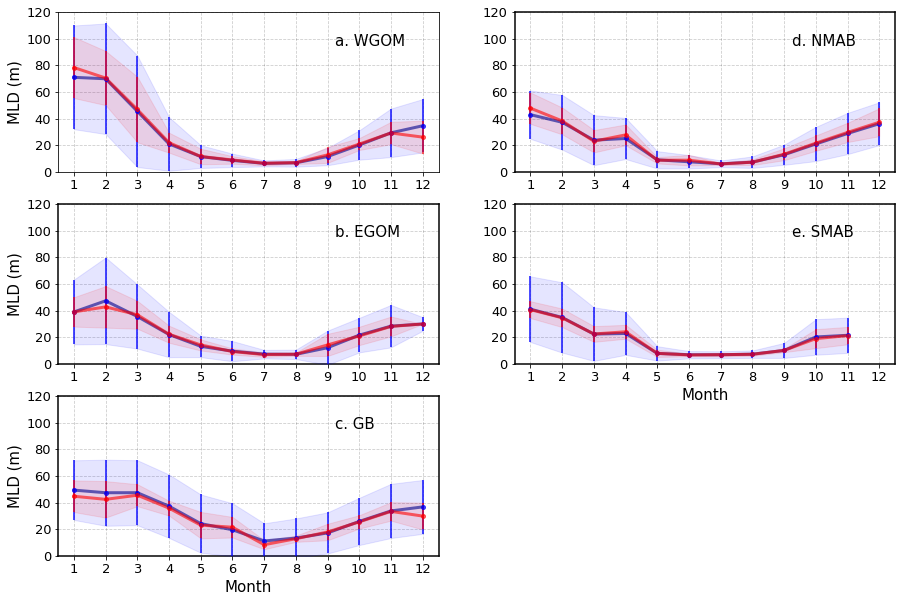

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(321) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)

plt.plot(month, t_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_mean, t_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_mean) - np.asarray(t_full_std), np.asarray(t_full_mean) + np.asarray(t_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_mean, t_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_mean) - np.asarray(t_interann_std), np.asarray(t_interann_mean) + np.asarray(t_interann_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('MLD (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'a. WGOM', dict(size=15))
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(322) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'd. NMAB', dict(size=15))

plt.plot(month, x_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_full_mean, x_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(x_full_mean) - np.asarray(x_full_std), np.asarray(x_full_mean) + np.asarray(x_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_interann_mean, x_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(x_interann_mean) - np.asarray(x_interann_std), np.asarray(x_interann_mean) + np.asarray(x_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(323) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'b. EGOM', dict(size=15))
plt.ylabel('MLD (m)', fontsize = 15)

plt.plot(month, y_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_full_mean, y_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(y_full_mean) - np.asarray(y_full_std), np.asarray(y_full_mean) + np.asarray(y_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, y_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_interann_mean, y_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(y_interann_mean) - np.asarray(y_interann_std), np.asarray(y_interann_mean) + np.asarray(y_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(324) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'e. SMAB', dict(size=15))
plt.xlabel('Month', fontsize = 15)

plt.plot(month, v_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_full_mean, v_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(v_full_mean) - np.asarray(v_full_std), np.asarray(v_full_mean) + np.asarray(v_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, v_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_interann_mean, v_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(v_interann_mean) - np.asarray(v_interann_std), np.asarray(v_interann_mean) + np.asarray(v_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(325) #------------------------
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 13) 
plt.text(9.25, 95, 'c. GB', dict(size=15))
plt.ylabel('MLD (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)

plt.plot(month, w_full_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_full_mean, w_full_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(w_full_mean) - np.asarray(w_full_std), np.asarray(w_full_mean) + np.asarray(w_full_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, w_interann_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_interann_mean, w_interann_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(w_interann_mean) - np.asarray(w_interann_std), np.asarray(w_interann_mean) + np.asarray(w_interann_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

# plt.savefig('replacedw5')
plt.show()

## MLT SEASONAL CYCLE

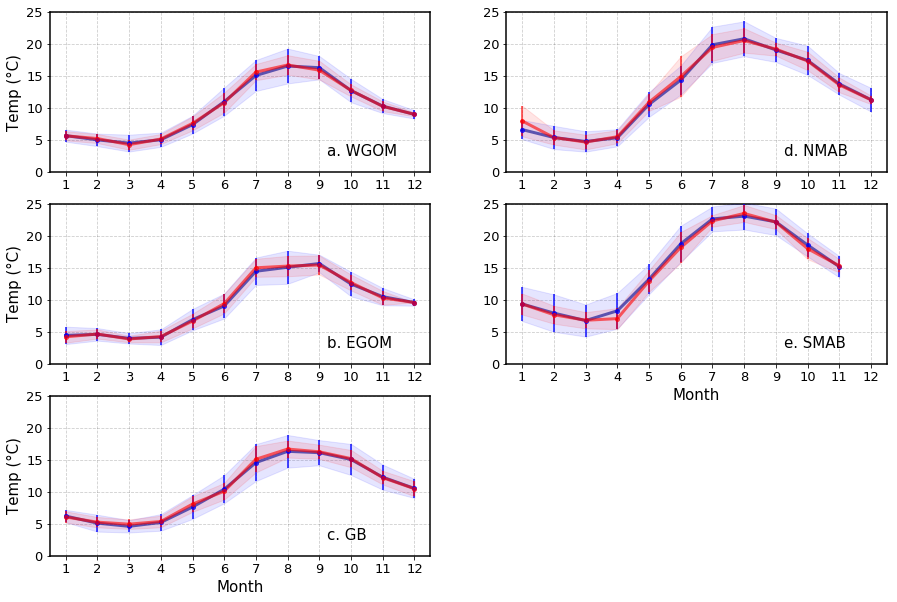

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(321) #------------------------
plt.ylim(0,25)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)

plt.plot(month, t_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_full_mlt_mean, t_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(t_full_mlt_mean) - np.asarray(t_full_mlt_std), np.asarray(t_full_mlt_mean) + np.asarray(t_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, t_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,t_interann_mlt_mean, t_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(t_interann_mlt_mean) - np.asarray(t_interann_mlt_std), np.asarray(t_interann_mlt_mean) + np.asarray(t_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)

plt.ylabel('Temp (°C)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
plt.text(9.25, 2.5, 'a. WGOM', dict(size=15))
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(322) #------------------------
plt.ylim(0,25)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
plt.text(9.25, 2.5, 'd. NMAB', dict(size=15))

plt.plot(month, x_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_full_mlt_mean, x_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(x_full_mlt_mean) - np.asarray(x_full_mlt_std), np.asarray(x_full_mlt_mean) + np.asarray(x_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, x_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,x_interann_mlt_mean, x_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(x_interann_mlt_mean) - np.asarray(x_interann_mlt_std), np.asarray(x_interann_mlt_mean) + np.asarray(x_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(323) #------------------------
plt.ylim(0,25)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
plt.text(9.25, 2.5, 'b. EGOM', dict(size=15))
plt.ylabel('Temp (°C)', fontsize = 15)

plt.plot(month, y_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_full_mlt_mean, y_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(y_full_mlt_mean) - np.asarray(y_full_mlt_std), np.asarray(y_full_mlt_mean) + np.asarray(y_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, y_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,y_interann_mlt_mean, y_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(y_interann_mlt_mean) - np.asarray(y_interann_mlt_std), np.asarray(y_interann_mlt_mean) + np.asarray(y_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(324) #------------------------
plt.ylim(0,25)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
plt.text(9.25, 2.5, 'e. SMAB', dict(size=15))
plt.xlabel('Month', fontsize = 15)

plt.plot(month, v_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_full_mlt_mean, v_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(v_full_mlt_mean) - np.asarray(v_full_mlt_std), np.asarray(v_full_mlt_mean) + np.asarray(v_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, v_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,v_interann_mlt_mean, v_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(v_interann_mlt_mean) - np.asarray(v_interann_mlt_std), np.asarray(v_interann_mlt_mean) + np.asarray(v_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

plt.subplot(325) #------------------------
plt.ylim(0,25)
plt.xlim(0.5,12.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25], fontsize = 13) 
plt.text(9.25, 2.5, 'c. GB', dict(size=15))
plt.ylabel('Temp (°C)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)

plt.plot(month, w_full_mlt_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_full_mlt_mean, w_full_mlt_std,linestyle='None', marker='o',color='blue',alpha= 0.7, markersize=4, zorder = 30,linewidth = 2)
plt.fill_between(month, np.asarray(w_full_mlt_mean) - np.asarray(w_full_mlt_std), np.asarray(w_full_mlt_mean) + np.asarray(w_full_mlt_std),color = 'blue', alpha = 0.1,zorder = 30)

plt.plot(month, w_interann_mlt_mean, linestyle='-', color='red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,w_interann_mlt_mean, w_interann_mlt_std,linestyle='None', marker='o',color='red',alpha= 0.6, markersize=4, zorder = 30, linewidth=2)
plt.fill_between(month, np.asarray(w_interann_mlt_mean) - np.asarray(w_interann_mlt_std), np.asarray(w_interann_mlt_mean) + np.asarray(w_interann_mlt_std),color = 'red', alpha = 0.1,zorder = 30)
mpl.rcParams['axes.linewidth'] = 1.5

# plt.savefig('mlt-replacedwith5')
plt.show()

## SPATIAL PLOTS

In [191]:
season = fall_list_reindex #spring #summer #fall #winter

variablelist_003 = []; yearlist = []; latlist = []; lonlist = []; bottomdepthlist = []; ratiolist = []; mltlist = []
for ii in range(len(season)):
    newdf = pd.DataFrame({'lon': list(season['obs_lon']),'lat': list(season['obs_lat'])})
    new = newdf.iloc[ii].values
    point = Point(new)
    if polygon_v.contains(point) == True and (season['bottomdepth'][ii]<=200):
        variablelist_003.append(season['003densmld'][ii])
        yearlist.append(season['year'][ii])
        latlist.append(season['obs_lat'][ii])
        lonlist.append(season['obs_lon'][ii])
        bottomdepthlist.append(season['bottomdepth'][ii])
        ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
        mltlist.append(season['tempatmld'][ii])
    elif polygon_x.contains(point) == True and (season['bottomdepth'][ii]<=200):
        variablelist_003.append(season['003densmld'][ii])
        yearlist.append(season['year'][ii])
        latlist.append(season['obs_lat'][ii])
        lonlist.append(season['obs_lon'][ii])
        bottomdepthlist.append(season['bottomdepth'][ii])
        ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
        mltlist.append(season['tempatmld'][ii])
    elif polygon_t.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True:
        variablelist_003.append(season['003densmld'][ii])
        yearlist.append(season['year'][ii])
        latlist.append(season['obs_lat'][ii])
        lonlist.append(season['obs_lon'][ii])
        bottomdepthlist.append(season['bottomdepth'][ii])
        ratiolist.append((season['003densmld'][ii])/(season['bottomdepth'][ii]))
        mltlist.append(season['tempatmld'][ii])
    else:
        pass
pandas = pd.DataFrame({'year': yearlist, 'mld': variablelist_003, 'lon': lonlist, 'lat': latlist, 'bottomdepth': bottomdepthlist, 'ratio': ratiolist, 'mlt': mltlist})


In [192]:
print(len(pandas))

10858


In [180]:
print(len(season))

11076


In [181]:
df = pandas
print(len(df))

10858


In [182]:
from scipy.interpolate import griddata

In [183]:
import numpy as np
from matplotlib.path import Path

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

grid = path_new.contains_points(points) 
grid = grid.reshape((22,22))

In [184]:
yearlist = list(df.year.unique())

yearlistint = [int(i) for i in yearlist]

print(yearlistint)

[1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2017]


In [185]:
full_of_zi = []
for i in range(len(yearlistint)):
    df_new = df[df.year == yearlistint[i]]
    x = df_new['lon']*-1
    y = df_new['lat']
    z = df_new['ratio'] #mlt #mld
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)

    xi,yi = np.meshgrid(xi,yi)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    zi = zi.reshape((22,22)) 
    full_of_zi.append(zi)

In [186]:
meangrid = np.nanmean(full_of_zi,axis = 0)
meangrid_1 = np.where(grid == True, meangrid, grid)
meangrid_2 = np.where(np.isnan(meangrid_1), 0, meangrid_1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


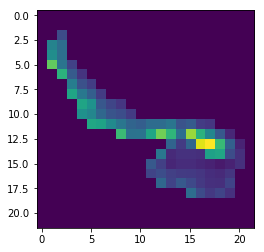

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(meangrid_2)

In [188]:
print(np.nanmax(meangrid_2))
print(np.nanmin(meangrid_2))
print(np.nanmean(meangrid_2))

0.9251563012799343
0.0
0.06332138875059135


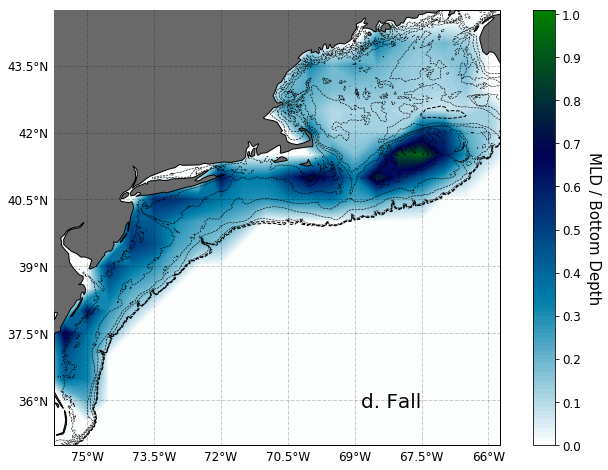

In [190]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'd. Fall', dict(size=20))
# cmap=plt.cm.get_cmap('Blues', 150)
cf = plt.contourf(xi,yi,meangrid_2, np.arange(0, 1.02,0.01), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,30.25,0.01), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,92,0.01), cmap = 'ocean_r')
ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], orientation='vertical')
cbar.ax.set_xticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
cbar.ax.tick_params(labelsize=12) 

# cbar = plt.colorbar(cf, ticks=[-80,-60,-40,-20,0,20,40,60,80], orientation='vertical')
# cbar.ax.set_xticklabels([0,20,40,60,80,100])
# # # cbar = plt.colorbar(cf, ax=ax)
cbar.ax.get_yaxis().labelpad = 20

cbar.ax.set_ylabel('MLD / Bottom Depth', rotation=270, fontsize = 15)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100])
# cbar.ax.tick_params(labelsize=12)

plt.savefig('Fall_ratio')
plt.show()

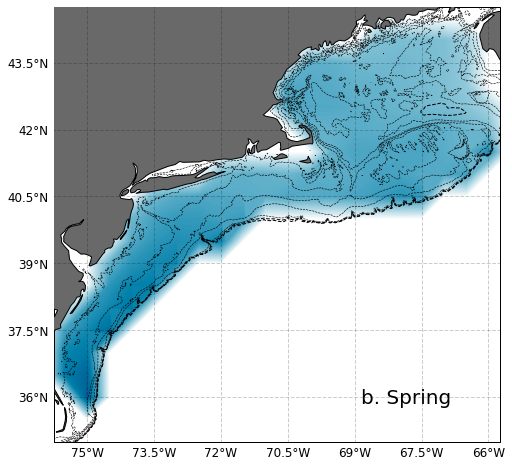

In [136]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'b. Spring', dict(size=20))
# cmap=plt.cm.get_cmap('Blues', 150)
# cf = plt.contourf(xi,yi,d, np.arange(0, 1.02,0.01), cmap = cmap)
# cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,30.25,0.01), cmap = 'ocean_r')
cf = plt.contourf(xi,yi,meangrid_2, np.arange(0,26.5,0.01), cmap = 'ocean_r')
ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
###cbar = plt.colorbar(cf, ticks=[0,2,4,6,8,10,12,14,16,18,20,22,24,26], orientation='vertical')
###cbar.ax.set_xticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26])
###cbar.ax.tick_params(labelsize=12) 

# cbar = plt.colorbar(cf, ticks=[-80,-60,-40,-20,0,20,40,60,80], orientation='vertical')
# cbar.ax.set_xticklabels([0,20,40,60,80,100])
# # # cbar = plt.colorbar(cf, ax=ax)
###cbar.ax.get_yaxis().labelpad = 20

###cbar.ax.set_ylabel('MLT (° C)', rotation=270, fontsize = 15)
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100])
# cbar.ax.tick_params(labelsize=12)

plt.savefig('Spring_temp')
plt.show()

# Comparison of observed dens. MLDs and observed temp. MLDs

In [215]:
# WINTER
merged_winter = pd.merge(winter_list_reindex, winter_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_winter = merged_winter.drop_duplicates(subset=['location'])
# SPRING
merged_spring = pd.merge(spring_list_reindex, spring_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_spring = merged_spring.drop_duplicates(subset=['location'])
# SUMMER
merged_summer = pd.merge(summer_list_reindex, summer_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_summer = merged_summer.drop_duplicates(subset=['location'])
# FALL
merged_fall = pd.merge(fall_list_reindex, fall_list_reindex_t, left_on=['location'], 
                        right_on = ['location'], left_index=True, how='outer', sort=False)
merged_fall = merged_fall.drop_duplicates(subset=['location'])

In [252]:
print(len(merged_fall))

11092


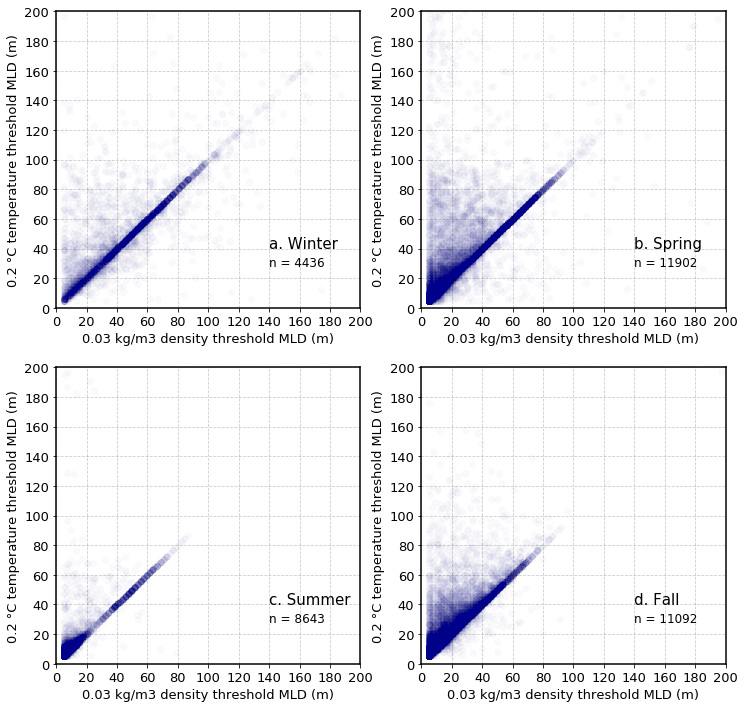

In [254]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_winter['003densmld'],merged_winter['02tempmld'],c='darkblue',alpha=0.02)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'a. Winter', dict(size=15))
plt.text(140, 28, 'n = 4436', dict(size=12))

plt.subplot(222)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_spring['003densmld'],merged_spring['02tempmld'],c='darkblue',alpha=0.02)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'b. Spring', dict(size=15))
plt.text(140, 28, 'n = 11902', dict(size=12))

plt.subplot(223)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_summer['003densmld'],merged_summer['02tempmld'],c='darkblue',alpha=0.02)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.text(140, 40, 'c. Summer', dict(size=15))
plt.text(140, 28, 'n = 8643', dict(size=12))

plt.subplot(224)
plt.xlim(0,200); plt.ylim(0,200)
plt.scatter(merged_fall['003densmld'],merged_fall['02tempmld'],c='darkblue',alpha=0.02)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('0.2 °C temperature threshold MLD (m)', fontsize = 13)
plt.xlabel('0.03 kg/m3 density threshold MLD (m)', fontsize = 13)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 13)
plt.text(140, 40, 'd. Fall', dict(size=15))
plt.text(140, 28, 'n = 11092', dict(size=12))

mpl.rcParams['axes.linewidth'] = 1.5
plt.savefig('Remake Figure 9')

In [255]:
# JAN
merged_jan = pd.merge(jan, jan_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_jan = merged_jan.drop_duplicates(subset=['location'])
# FEB
merged_feb = pd.merge(feb, feb_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_feb = merged_feb.drop_duplicates(subset=['location'])
# MARCH
merged_march = pd.merge(march, march_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_march = merged_march.drop_duplicates(subset=['location'])
# APRIL
merged_april = pd.merge(april, april_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_april = merged_april.drop_duplicates(subset=['location'])
# MAY
merged_may = pd.merge(may, may_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_may = merged_may.drop_duplicates(subset=['location'])
# JUNE
merged_june = pd.merge(june, june_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_june = merged_june.drop_duplicates(subset=['location'])
# JULY
merged_july = pd.merge(july, july_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_july = merged_july.drop_duplicates(subset=['location'])
# AUGUST
merged_aug = pd.merge(aug, aug_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_aug = merged_aug.drop_duplicates(subset=['location'])
# SEPTEMBER
merged_sept = pd.merge(sept, sept_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_sept = merged_sept.drop_duplicates(subset=['location'])
# OCTOBER
merged_octob = pd.merge(octob, octob_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_octob = merged_octob.drop_duplicates(subset=['location'])
# NOVEMBER
merged_nov = pd.merge(nov, nov_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_nov = merged_nov.drop_duplicates(subset=['location'])
# DECEMBER
merged_dec = pd.merge(dec, dec_t, left_on=['location'], right_on = ['location'], left_index=True, how='outer', sort=False)
merged_dec = merged_dec.drop_duplicates(subset=['location'])

In [320]:
merged_winter = [merged_dec, merged_jan, merged_feb]; merged_winter_list = pd.concat(merged_winter); merged_winter_list_reindex = merged_winter_list.reset_index()
merged_spring = [merged_march, merged_april, merged_may]; merged_spring_list = pd.concat(merged_spring); merged_spring_list_reindex = merged_spring_list.reset_index()
merged_summer = [merged_june, merged_july, merged_aug]; merged_summer_list = pd.concat(merged_summer); merged_summer_list_reindex = merged_summer_list.reset_index()
merged_fall = [merged_sept, merged_octob, merged_nov]; merged_fall_list = pd.concat(merged_fall); merged_fall_list_reindex = merged_fall_list.reset_index()

In [256]:
merged_full = [merged_jan.reset_index(), merged_feb.reset_index(), merged_march.reset_index(), merged_april.reset_index(), 
        merged_may.reset_index(), merged_june.reset_index(), merged_july.reset_index(), merged_aug.reset_index(), 
        merged_sept.reset_index(), merged_octob.reset_index(), merged_nov.reset_index(), merged_dec.reset_index()]

In [261]:
t_interann_mean_densmld = []; t_interann_mean_tempmld = []
y_interann_mean_densmld = []; y_interann_mean_tempmld = []
w_interann_mean_densmld = []; w_interann_mean_tempmld = []
x_interann_mean_densmld = []; x_interann_mean_tempmld = []
v_interann_mean_densmld = []; v_interann_mean_tempmld = []

for i in range(len(merged_full)): #full
    season = merged_full[i] #full
    
    variablelist_003_t = []; yearlist_t = []; temp_mld_t = []
    variablelist_003_y = []; yearlist_y = []; temp_mld_y = []
    variablelist_003_x = []; yearlist_x = []; temp_mld_x = []
    variablelist_003_v = []; yearlist_v = []; temp_mld_v = []
    variablelist_003_w = []; yearlist_w = []; temp_mld_w = []
    
    newdf = pd.DataFrame({'lon': list(season['obs_lon_x']),'lat': list(season['obs_lat_x'])})
 
    for ii in range(len(season)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_t.contains(point) == True:
            variablelist_003_t.append(season['003densmld'][ii])
            yearlist_t.append(season['year_x'][ii])
            temp_mld_t.append(season['02tempmld'][ii])
        elif polygon_y.contains(point) == True:
            variablelist_003_y.append(season['003densmld'][ii])
            yearlist_y.append(season['year_x'][ii])
            temp_mld_y.append(season['02tempmld'][ii])
        elif polygon_w.contains(point) == True:
            variablelist_003_w.append(season['003densmld'][ii])
            yearlist_w.append(season['year_x'][ii])
            temp_mld_w.append(season['02tempmld'][ii])
        elif polygon_v.contains(point) == True and (season['bottomdepth_x'][ii]<=200):
            variablelist_003_v.append(season['003densmld'][ii])
            yearlist_v.append(season['year_x'][ii])
            temp_mld_v.append(season['02tempmld'][ii])
        elif polygon_x.contains(point) == True and (season['bottomdepth_x'][ii]<=200):
            variablelist_003_x.append(season['003densmld'][ii])
            yearlist_x.append(season['year_x'][ii])
            temp_mld_x.append(season['02tempmld'][ii])
        else:
            pass
    
    pandas_t = pd.DataFrame({'year': yearlist_t, 'variable': variablelist_003_t, '02tempmld': temp_mld_t})
    use = pandas_t    
    interannual_grouped_003_t = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_t
    
    t_interann_mean_densmld.append(np.mean(use_inter['variable']))
    t_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_y= pd.DataFrame({'year': yearlist_y, 'variable': variablelist_003_y, '02tempmld': temp_mld_y})
    use = pandas_y
    interannual_grouped_003_y = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_y
    
    y_interann_mean_densmld.append(np.mean(use_inter['variable']))
    y_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_w= pd.DataFrame({'year': yearlist_w, 'variable': variablelist_003_w, '02tempmld': temp_mld_w})
    use = pandas_w    
    interannual_grouped_003_w = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_w

    w_interann_mean_densmld.append(np.mean(use_inter['variable']))
    w_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_x= pd.DataFrame({'year': yearlist_x, 'variable': variablelist_003_x, '02tempmld': temp_mld_x})
    use = pandas_x
    interannual_grouped_003_x = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_x
    
    x_interann_mean_densmld.append(np.mean(use_inter['variable']))
    x_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))
#----------------------------------------------------------------------------------
    pandas_v= pd.DataFrame({'year': yearlist_v, 'variable': variablelist_003_v, '02tempmld': temp_mld_v})
    use = pandas_v
    interannual_grouped_003_v = use.groupby(['year']).mean(); use_inter = interannual_grouped_003_v
    
    v_interann_mean_densmld.append(np.mean(use_inter['variable']))
    v_interann_mean_tempmld.append(np.mean(use_inter['02tempmld']))

In [266]:
t_diff = [a_i - b_i for a_i, b_i in zip(t_interann_mean_tempmld, t_interann_mean_densmld)]
y_diff = [a_i - b_i for a_i, b_i in zip(y_interann_mean_tempmld, y_interann_mean_densmld)]
w_diff = [a_i - b_i for a_i, b_i in zip(w_interann_mean_tempmld, w_interann_mean_densmld)]
x_diff = [a_i - b_i for a_i, b_i in zip(x_interann_mean_tempmld, x_interann_mean_densmld)]
v_diff = [a_i - b_i for a_i, b_i in zip(v_interann_mean_tempmld, v_interann_mean_densmld)]

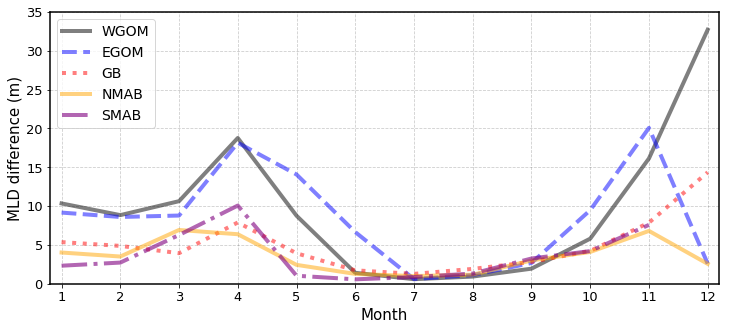

In [319]:
plt.figure(figsize=(12,5))


plt.plot(month, t_diff, color='k', linestyle='solid', linewidth=4,alpha=0.5,label='WGOM')
plt.plot(month, y_diff, color='blue',linestyle='dashed', linewidth=4,alpha=0.5,label='EGOM')
plt.plot(month, w_diff, color='red', linestyle='dotted', linewidth=4,alpha=0.5,label='GB')
plt.plot(month, x_diff, color='orange', linewidth=4,alpha=0.5,label='NMAB')
plt.plot(month, v_diff, color='purple', linestyle='dashdot', linewidth=4,alpha=0.6,label='SMAB')
plt.xlim(0.8,12.2); plt.ylim(0,35)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD difference (m)', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 13) 
plt.yticks([0,5,10,15,20,25,30,35], fontsize = 13) 
mpl.rcParams['axes.linewidth'] = 1.5
plt.legend(fontsize=14)
plt.savefig('Remake Figure 10')

In [333]:
pandas_winter = pd.DataFrame({'lon':merged_winter_list_reindex['obs_lon_x'], 'lat':merged_winter_list_reindex['obs_lat_x']
    ,'densmld': merged_winter_list_reindex['003densmld'],'tempmld': merged_winter_list_reindex['02tempmld'], 'diff':merged_winter_list_reindex['02tempmld']-merged_winter_list_reindex['003densmld'] })
pandas_spring = pd.DataFrame({'lon':merged_spring_list_reindex['obs_lon_x'], 'lat':merged_spring_list_reindex['obs_lat_x']
    ,'densmld': merged_spring_list_reindex['003densmld'],'tempmld': merged_spring_list_reindex['02tempmld'], 'diff':merged_spring_list_reindex['02tempmld']-merged_spring_list_reindex['003densmld']})
pandas_summer = pd.DataFrame({'lon':merged_summer_list_reindex['obs_lon_x'], 'lat':merged_summer_list_reindex['obs_lat_x']
    ,'densmld': merged_summer_list_reindex['003densmld'],'tempmld': merged_summer_list_reindex['02tempmld'], 'diff':merged_summer_list_reindex['02tempmld']-merged_summer_list_reindex['003densmld']})
pandas_fall = pd.DataFrame({'lon':merged_fall_list_reindex['obs_lon_x'], 'lat':merged_fall_list_reindex['obs_lat_x']
    ,'densmld': merged_fall_list_reindex['003densmld'],'tempmld': merged_fall_list_reindex['02tempmld'], 'diff':merged_fall_list_reindex['02tempmld']-merged_fall_list_reindex['003densmld']})


In [386]:
print('Winter')
print(np.nanmean(pandas_winter['diff']))
print(np.nanstd(pandas_winter['diff']))

winter_bigdiff_pos = pandas_winter[pandas_winter['diff'] > (np.nanstd(pandas_winter['diff']))]
winter_bigdiff_neg = pandas_winter[pandas_winter['diff'] < -(np.nanstd(pandas_winter['diff']))]
print(len(winter_bigdiff_pos))
print(len(winter_bigdiff_neg))
print(np.nanmean(winter_bigdiff_neg['diff']))
print(np.nanmin(winter_bigdiff_neg['diff']))
print(np.nanmean(winter_bigdiff_pos['diff']))
print(np.nanmax(winter_bigdiff_pos['diff']))

winter_diff = [winter_bigdiff_pos, winter_bigdiff_neg]; winter_diff_list = pd.concat(winter_diff)

winter_datalatlon = pd.DataFrame({'lon': merged_winter_list_reindex['obs_lon_x'],'lat': merged_winter_list_reindex['obs_lat_x']})
print(len(winter_datalatlon))

Winter
4.690103329506315
18.413567250458062
515
109
-40.485321100917425
-162.0
42.70621359223301
202.0


In [430]:
print('Spring')
print(np.nanmean(pandas_spring['diff']))
print(np.nanstd(pandas_spring['diff']))

spring_bigdiff_pos = pandas_spring[pandas_spring['diff'] > (np.nanstd(pandas_spring['diff']))]
spring_bigdiff_neg = pandas_spring[pandas_spring['diff'] < -(np.nanstd(pandas_spring['diff']))]
print(len(spring_bigdiff_pos))
print(len(spring_bigdiff_neg))
print(np.nanmean(spring_bigdiff_pos['diff']))
print(np.nanmean(spring_bigdiff_neg['diff']))

spring_diff = [spring_bigdiff_pos, spring_bigdiff_neg]; spring_diff_list = pd.concat(spring_diff)

spring_datalatlon = pd.DataFrame({'lon': merged_spring_list_reindex['obs_lon_x'],'lat': merged_spring_list_reindex['obs_lat_x']})
print(len(spring_datalatlon))

Spring
7.722044398554465
23.404256482440918
1188
93
60.46683501683502
-47.384946236559145
11902


In [441]:
print('Summer')
print(np.nanmean(pandas_summer['diff']))
print(np.nanstd(pandas_summer['diff']))

summer_bigdiff_pos = pandas_summer[pandas_summer['diff'] > (np.nanstd(pandas_summer['diff']))]
summer_bigdiff_neg = pandas_summer[pandas_summer['diff'] < -(np.nanstd(pandas_summer['diff']))]
print(len(summer_bigdiff_pos))
print(len(summer_bigdiff_neg))
print(np.nanmean(summer_bigdiff_pos['diff']))
print(np.nanmean(summer_bigdiff_neg['diff']))

summer_diff = [summer_bigdiff_pos, summer_bigdiff_neg]; summer_diff_list = pd.concat(summer_diff)

summer_datalatlon = pd.DataFrame({'lon': merged_summer_list_reindex['obs_lon_x'],'lat': merged_summer_list_reindex['obs_lat_x']})
print(len(summer_datalatlon))

Summer
1.7613741875580315
9.966980567851428
243
11
34.63127572016461
-28.636363636363637
8643


In [442]:
print('Fall')
print(np.nanmean(pandas_fall['diff']))
print(np.nanstd(pandas_fall['diff']))

fall_bigdiff = pandas_fall[pandas_fall['diff'] > (np.nanstd(pandas_fall['diff']))]
print(len(fall_bigdiff))

fall_bigdiff_pos = pandas_fall[pandas_fall['diff'] > (np.nanstd(pandas_fall['diff']))]
fall_bigdiff_neg = pandas_fall[pandas_fall['diff'] < -(np.nanstd(pandas_fall['diff']))]
print(len(fall_bigdiff_pos))
print(len(fall_bigdiff_neg))
print(np.nanmean(fall_bigdiff_pos['diff']))
print(np.nanmean(fall_bigdiff_neg['diff']))

fall_diff = [fall_bigdiff_pos, fall_bigdiff_neg]; fall_diff_list = pd.concat(fall_diff)

fall_datalatlon = pd.DataFrame({'lon': merged_fall_list_reindex['obs_lon_x'],'lat': merged_fall_list_reindex['obs_lat_x']})
print(len(fall_datalatlon))


Fall
5.91977731130784
12.523397775968318
1476
1476
47
29.93089430894309
-24.02127659574468
11092


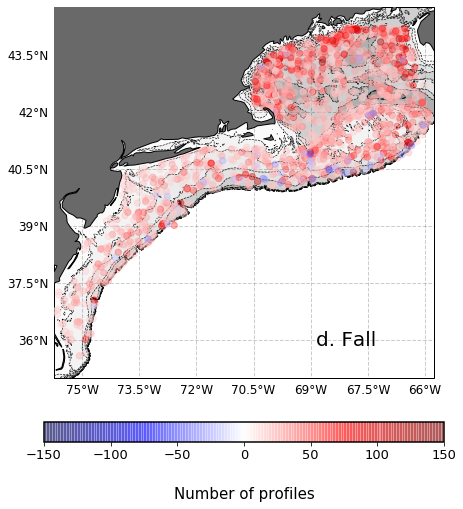

In [449]:
difflist = fall_diff_list

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.2, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
cf = plt.contourf(lonNC,latNC,depthNC, [-400,-300,-200,-100,-75,-50,-25,0], cmap = 'gray',alpha=0.5)
ax.contour(lonNC, latNC, depthNC, [-400,-300], linewidths=1,colors='black', alpha = 1,zorder=20) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-200,-100], linewidths=0.6,colors='black', alpha = 1,zorder=20) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=0.6,colors='black',zorder=20)

plt.scatter(difflist['lon']*-1, difflist['lat'], c=difflist['diff'],vmin=-150, vmax=150, s=40,alpha = 0.4,zorder=50,cmap = 'seismic')

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=200)

plt.text(-68.85, 35.85, 'd. Fall', dict(size=20))
cbar = plt.colorbar(orientation="horizontal",fraction=0.046, pad=0.1)
cbar.ax.get_xaxis().labelpad = 25
cbar.ax.set_xlabel('Number of profiles', rotation=0, fontsize = 15)
cbar.set_ticks([-150,-100,-50,0,50,100,150])
cbar.ax.tick_params(labelsize=13)

plt.savefig('Fall-Fig11')
plt.show()

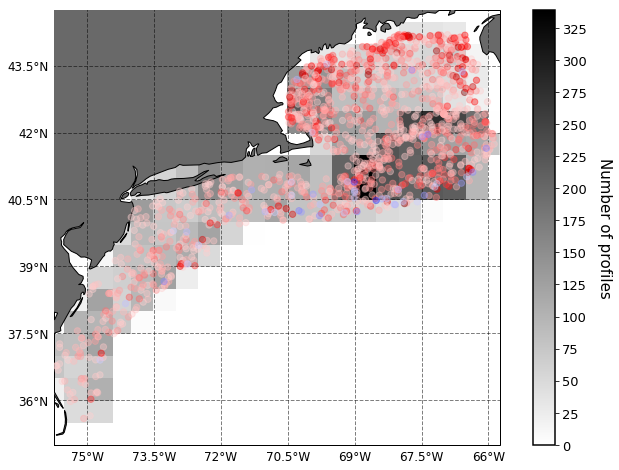

In [452]:
histuse = fall_datalatlon
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

xedges = [-78,-77.5,-77.0,-76.5,-76,-75.5,-75,-74.4,-74,-73.5,-73,-72.5,-72,-71.5,-71,-70.5,-70,-69.5,-69,-68.5,-68,-67.5,-67,-66.5,-66,-65.5]
yedges = [35,35.5,36.0,36.5,37,37.5,38,38.5,39,39.5,40.0,40.5,41.5,42,42.5,43,43.5,44,44.5,45]
plt.scatter(difflist['lon']*-1, difflist['lat'], c=difflist['diff'],vmin=-150, vmax=150, s=40,alpha = 0.4,zorder=50,cmap = 'seismic')
plt.hist2d(histuse['lon']*-1, histuse['lat'], bins = [xedges,yedges], cmap = 'gray_r')
# plt.scatter(winter_diff_list['lon']*-1, winter_diff_list['lat'], c=winter_diff_list['diff'],vmin=-150, vmax=150, s=40,alpha = 0.4,zorder=50,cmap = 'seismic')

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Number of profiles', rotation=-90, fontsize = 15)
cbar.set_ticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325])
cbar.ax.tick_params(labelsize=13)
plt.savefig('Fall-Fig11')
plt.show()